In [78]:
#**idea is from 
#https://arxiv.org/abs/1712.01208
#**inspiration for this code is from
#https://github.com/Learned-Index-Structure/LIS-Training/blob/master/Example.ipynb

#making the margins wider in jupyter
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#Creating a linear dataset with a little bit of randomness
import random
import math
from matplotlib import pyplot as plt
#the key or value of the data
x = []
#the position of the data
y = []
for i in range(1,1000):
    y.append(i)
    num = math.ceil(2 ** 3 + 4 ** (2) * + 3*i * math.log(i))# + random.randrange(0,1)
    #num = 8*i + random.randrange(0,6)
    x.append(num)

[float(num) for num in x]
[math.ceil(float(num)) for num in y]
#x will be from 1 to 500
#y will be num

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

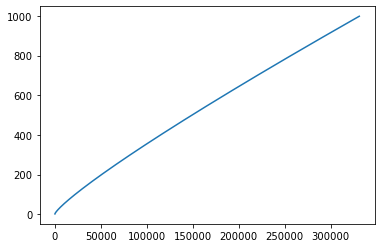

In [79]:
plt.plot(x,y)

Text(0, 0.5, 'y - position of the data')

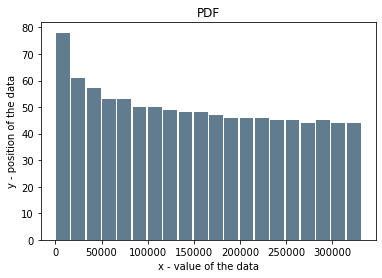

In [80]:
plt.hist(x, bins=20, rwidth=0.9,
         color='#607c8e')
plt.title('PDF')
plt.xlabel('x - value of the data')
plt.ylabel('y - position of the data')

(array([0.07807808, 0.06106106, 0.05705706, 0.05305305, 0.05305305,
        0.05005005, 0.05005005, 0.04904905, 0.04804805, 0.04804805,
        0.04704705, 0.04604605, 0.04604605, 0.04604605, 0.04504505,
        0.04504505, 0.04404404, 0.04504505, 0.04404404, 0.04404404]),
 array([8.000000e+00, 1.656760e+04, 3.312720e+04, 4.968680e+04,
        6.624640e+04, 8.280600e+04, 9.936560e+04, 1.159252e+05,
        1.324848e+05, 1.490444e+05, 1.656040e+05, 1.821636e+05,
        1.987232e+05, 2.152828e+05, 2.318424e+05, 2.484020e+05,
        2.649616e+05, 2.815212e+05, 2.980808e+05, 3.146404e+05,
        3.312000e+05]),
 <a list of 20 Patch objects>)

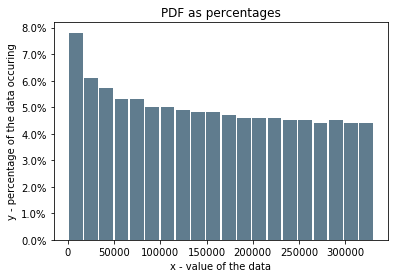

In [81]:
from matplotlib.ticker import PercentFormatter
import numpy as np
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('PDF as percentages')
plt.xlabel('x - value of the data')
plt.ylabel('y - percentage of the data occuring')
plt.hist(x, weights=np.ones(len(x)) / len(x),
         bins=20, rwidth=0.9, color='#607c8e')

Text(0, 0.5, 'y - probability % (if it was out of 100)')

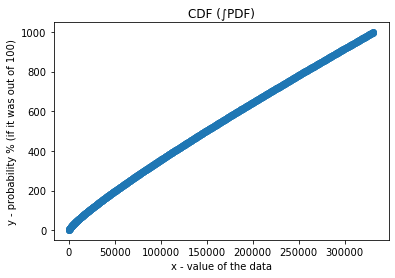

In [82]:
#The culmative distribution function
plt.plot(x, y, marker='o')
plt.title('CDF (∫PDF)')
plt.xlabel('x - value of the data')
plt.ylabel('y - probability % (if it was out of 100)')

In [83]:
#making sure there are no duplicates
#also need to check to see if the data is sorted (I made the equation so that it would be sorted)
duplicates = []
for item in x:
    if x.count(item) > 1:
        duplicates.append(item)
print(duplicates)

[]


In [84]:
#writing the x to col 1 and y to col 2 in a csv file
import csv

with open('data1.csv', 'w', newline='') as file:
    writer = csv.writer(file)

    for ix,iy in zip(x,y ):
        writer.writerow([ix,iy])

In [85]:
#x is the key
#y is the pos or value
#reading data in from csv to make it more versatile
#Do not need to do this section if you just want to use the data that was just created
import pandas as pd
from sklearn.model_selection import train_test_split

values = ["key", "pos"]
data = pd.read_csv(r"C:/Users/black/CS499/simpleRMI/data1.csv", header=None, skipinitialspace=True,
                   names=values, na_values=["?"], sep=',')

data["key"] = data.key.astype(float)
data["pos"] = data.pos.astype(float)

x_data = data["key"].values
y_data = data["pos"].values

#if you want to do a train test split
#X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.0001)

In [93]:
#building the neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(1,)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1))
    #found better results with mae than mse
    model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae'])
    return model

model = build_model()
model.fit(x_data, y_data, epochs=75, batch_size=1000, verbose=0)
mse_score, mae_score = model.evaluate(x_data, y_data)

#mae - mean absolute error
#mse - mean squared error
print(mae_score)
print(mse_score)

999/999 [==============================] - 0s 56us/step
27.856740951538086
27.856739964451755


In [133]:
import numpy as np
import math

key = 238330
#position of the key you are trying to predict
key_pos_list = 749
#if you want to test multiple x(key) values at a time
#ex. array = np.array([0,100,101])
array = np.array([key_pos_list])
#if you want to test multiple x(key) values at a time
test_key = key#x_data[array]
array = [key]
print("The key(s) you are testing:", test_key)
#getting the predictions from the NN
pred = model.predict_on_batch(array)
print("The predictions for the position of the key(s) are:",pred)

#getting one x(key) value to run the linear models on
#this value will now go to stage 2 of the RMI
fine_tune_pred = math.ceil(pred[0])
print("The prediction for the position of the key that is going to the linear model:", fine_tune_pred)

The key(s) you are testing: 238330
The predictions for the position of the key(s) are: [[770.655]]
The prediction for the position of the key that is going to the linear model: 771


In [134]:
#how many different buckets
buckets = 100

#splitting the data up evenly into the number of buckets specified
#ex. if data from 1 to 100 and 10 specificed buckets
#data 1 to 10 in bucket 0
#11 to 20 in bucket 1 ...
#91-100 in bucket 9
xdata = np.array_split(x_data, buckets)
ydata = np.array_split(y_data, buckets)

for i in range(0, buckets):
    #seeing which bucket will the NN prediction fall into
    if((fine_tune_pred >= ydata[i][0]) & (fine_tune_pred <= ydata[i][-1])):
        print("The values in the", i, "bucket range from:", ydata[i][0], "to:", ydata[i][-1])
        print("The NN predicted:", fine_tune_pred)
        print("The prediction falls under bucket:", i)
        in_bucket = i

The values in the 77 bucket range from: 771.0 to: 780.0
The NN predicted: 771
The prediction falls under bucket: 77


The equation for this bucket [[0.00272205]] * X + [101.30780694]
The equation for the specified key [[0.00272205]] * 238330 + [101.30780694]
The linear model predicted the position: [[750.0547894]]
The actual position of the key: 750
The actual y max value for the bucket: [780.]
The actual y min value for the bucket: [771.]
The min error that the linear regression predicted: -0.001105059548990539
The max error that the linear regression predicted: 0.0013198204716218243


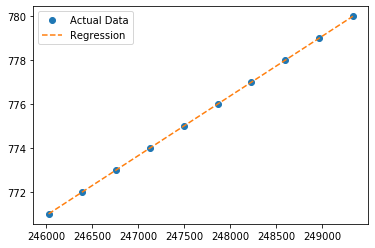

It took 2 iterations to find the actual position value


In [135]:
#creating a linear regression model on the dataset in the chosen bucket
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

#linear regression model
re_x_data = xdata[in_bucket].reshape(-1,1)
re_y_data = ydata[in_bucket].reshape(-1,1)
regressor = LinearRegression()  
regressor.fit(re_x_data, re_y_data)

#printing out the equation for this bucket with the key you wanted to test
print("The equation for this bucket", regressor.coef_, "* X", "+",regressor.intercept_)
print("The equation for the specified key", regressor.coef_, "*", key, "+",regressor.intercept_)
predicted_position = regressor.coef_ * key + regressor.intercept_
print("The linear model predicted the position:",predicted_position)
actual = math.ceil(y_data[key_pos_list])
print("The actual position of the key:", actual)

#the actual y max/min value for the bucket
y_max = re_y_data[-1]
y_min = re_y_data[0]
#getting the predictions for each x(key) value for the bucket
error = regressor.predict(re_x_data)
#getting how far off the linear regression prediction was off from the actual values
diff = np.subtract(re_y_data, error)

print("The actual y max value for the bucket:", y_max)
print("The actual y min value for the bucket:", y_min)
print("The min error that the linear regression predicted:", np.min(diff))
print("The max error that the linear regression predicted:", np.max(diff))

#plotting the bucket data
#the actual data points are the circles
#the function that the linear regression predicted in the dotted line
plt.clf()
plt.plot(re_x_data, re_y_data, 'o', label='Actual Data', alpha=1.0)
plt.plot(re_x_data, error, '--', label='Regression', alpha=1.0)
plt.legend(loc='best')
plt.show()

#using exponential search to search for the actual y(position) value
#could possibly try binary search with the ends being the min and max errors for larger datasets
counting = 0
upcount = 1
downcount = 1
searching = 1
n_pp = math.ceil(predicted_position)
#n_pp = math.ceil(predicted_position + np.max(diff))
#print("Adding in the error bound:", n_pp)
while searching == 1:
    if(n_pp == actual):
        searching = 0
    elif(n_pp < actual):
        n_pp += upcount
        upcount *= 2
        downcount = 1
    elif(n_pp > actual):
        n_pp -= downcount
        downcount *= 2
        upcount = 1
    counting += 1
print("It took",counting, "iterations to find the actual position value")

In [116]:
#printing out the equation for each bucket using linear regression
for i in range(0, buckets):
    re_x_data = xdata[i].reshape(-1,1)
    re_y_data = ydata[i].reshape(-1,1)
    regressor = LinearRegression()  
    regressor.fit(re_x_data, re_y_data)
    print("Bucket", i, ":", regressor.coef_, "* X +",regressor.intercept_)

Bucket 0 : [[0.00791679]] * X + [1.55981383]
Bucket 1 : [[0.00558323]] * X + [4.00077694]
Bucket 2 : [[0.0049187]] * X + [5.92605284]
Bucket 3 : [[0.00456113]] * X + [7.69761402]
Bucket 4 : [[0.00432648]] * X + [9.37478703]
Bucket 5 : [[0.00415441]] * X + [11.00293428]
Bucket 6 : [[0.00402091]] * X + [12.58929165]
Bucket 7 : [[0.00391446]] * X + [14.11854989]
Bucket 8 : [[0.00382331]] * X + [15.66109597]
Bucket 9 : [[0.0037481]] * X + [17.13240911]
Bucket 10 : [[0.00368162]] * X + [18.60974701]
Bucket 11 : [[0.00362397]] * X + [20.04747933]
Bucket 12 : [[0.00357235]] * X + [21.47757518]
Bucket 13 : [[0.00352608]] * X + [22.88818251]
Bucket 14 : [[0.00348343]] * X + [24.30969772]
Bucket 15 : [[0.00344611]] * X + [25.66096235]
Bucket 16 : [[0.00341085]] * X + [27.03839869]
Bucket 17 : [[0.00337692]] * X + [28.46578042]
Bucket 18 : [[0.00334814]] * X + [29.76216269]
Bucket 19 : [[0.00332025]] * X + [31.1001208]
Bucket 20 : [[0.0032938]] * X + [32.44812169]
Bucket 21 : [[0.00326901]] * X +

In [117]:
#for grid search
#https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

xs_data = x_data.reshape(-1,1)
ys_data = y_data.reshape(-1,1)
clf_gs = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
clf_gs.fit(xs_data, np.ravel(ys_data))
print(clf_gs.predict([[key]]))
print(clf_gs)

print(clf_gs.best_score_)
print(sorted(clf_gs.cv_results_.keys()))
print("Best C value:", clf_gs.best_estimator_.C)
print("Best epsilon value:",clf_gs.best_estimator_.epsilon)
print("Best gamma value:",clf_gs.best_estimator_.gamma)

[740.00040886]
GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 100, 1000],
                         'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                     0.1, 0.5, 1, 5, 10],
                         'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)
-127503.50990516669
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_C', 'param_epsilon', 'param_gamma', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_

In [118]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(xs_data, np.ravel(ys_data))

print(neigh.predict([[key]]))

[750.]


Using max depth 1: 749.5 
The entire decisions: [250.  250.  250.  ... 749.5 749.5 749.5]
Using max depth 5: 765.0 
The entire decisions: [ 16.  16.  16. ... 765. 765. 765.]
Using max depth 10: 750.0 
The entire decisions: [  1.   1.   1. ... 750. 750. 750.]


C:\Python37\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


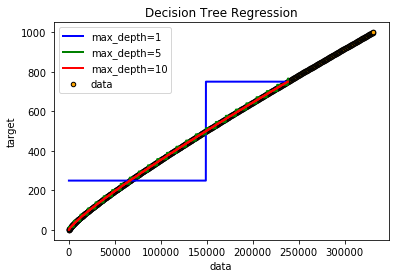

In [119]:
#https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=1)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(xs_data, np.ravel(ys_data))
regr_2.fit(xs_data, np.ravel(ys_data))
regr_3.fit(xs_data, np.ravel(ys_data))

# Predict
X_test = np.arange(key)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

print("Using max depth 1:", y_1[-1], "\nThe entire decisions:", y_1)
print("Using max depth 5:", y_2[-1], "\nThe entire decisions:", y_2)
print("Using max depth 10:", y_3[-1], "\nThe entire decisions:", y_3)

# Plot the results
plt.figure()
plt.scatter(xs_data, np.ravel(ys_data), s=20, edgecolor="black", c="orange", label="data")
plt.plot(X_test, y_1, color="blue", label="max_depth=1", linewidth=2)
plt.plot(X_test, y_2, color="green", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_3, color="red", label="max_depth=10", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [120]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html
from sklearn import linear_model
clf_r = linear_model.BayesianRidge()
clf_r.fit(xs_data, np.ravel(ys_data))

clf_r.predict([[key]])

array([748.41796425])

MSE: 3.8145
Predicted position for 238330   [748.38708614]


Text(0, 0.5, 'Deviance')

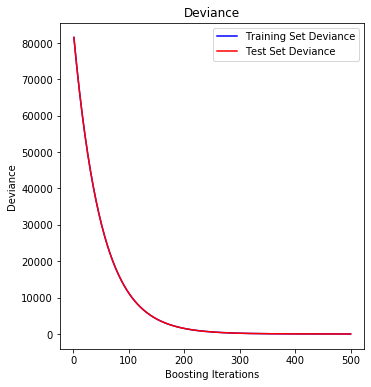

In [121]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
import numpy as np
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf_gb = ensemble.GradientBoostingRegressor(**params)

clf_gb.fit(xs_data, np.ravel(ys_data))
mse_gb = mean_squared_error(np.ravel(ys_data), clf_gb.predict(xs_data))
print("MSE: %.4f" % mse_gb)
print("Predicted position for", key," ", clf_gb.predict([[key]]))

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(clf_gb.staged_predict(xs_data)):
    test_score[i] = clf_gb.loss_(np.ravel(ys_data), y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf_gb.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')